In [ ]:
!pip install lightgbm

In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

import re
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb

import joblib

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Resume.csv to Resume.csv


In [ ]:
df = pd.read_csv('Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


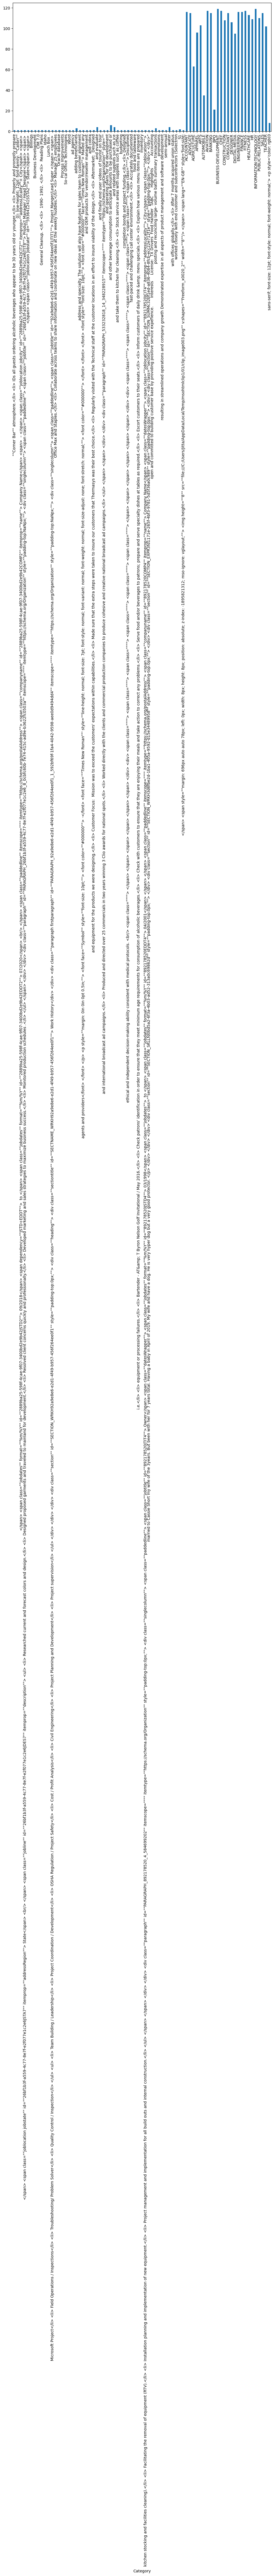

In [ ]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [ ]:
# Data preprocessing function

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [ ]:
# Data Preprocessing
df['Resume_str'] = df['Resume_str'].apply(lambda x: cleanResume(x)) # Cleaning the text data

var_mod = ['Category'] # Encoding categorical labels
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

requiredText = df['Resume_str'].values # Preparing text data and labels
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer( # Feature extraction using TF-IDF
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [ ]:
# Save the LabelEncoder
joblib.dump(le, 'RS_LabelEncoder.pkl')

['RS_LabelEncoder.pkl']

In [ ]:
joblib.dump(word_vectorizer, 'RS_Model_Vectorizer.pkl')

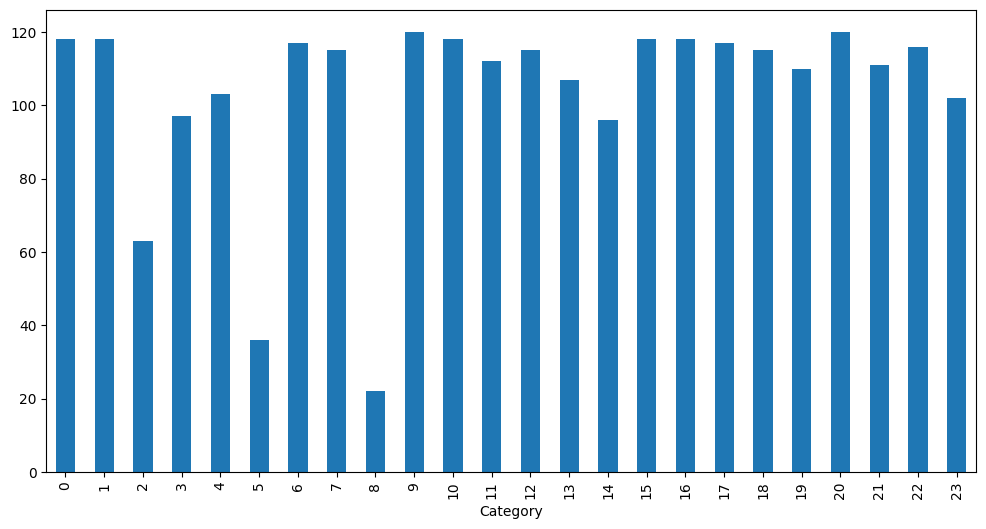

In [ ]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [ ]:
# Data Distribution
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(1987, 1500)
(497, 1500)


**K-Nearest Neighbors Classifier**

In [ ]:
# Model Training and Testing
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_prediction = knn_model.predict(X_test)

In [ ]:
# Classification report
print("Classification report for classifier %s:\n%s" % (knn_model, classification_report(y_test, knn_prediction)))

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.41      0.89      0.57        19
           1       0.21      0.40      0.27        20
           2       0.33      0.19      0.24        16
           3       0.14      0.18      0.16        17
           4       0.23      0.20      0.21        25
           5       0.00      0.00      0.00         6
           6       0.74      0.57      0.65        35
           7       0.52      0.52      0.52        23
           8       0.00      0.00      0.00         8
           9       0.29      0.68      0.40        28
          10       0.83      0.65      0.73        23
          11       0.73      0.76      0.74        21
          12       0.27      0.15      0.19        20
          13       0.90      0.50      0.64        18
          14       0.45      0.62      0.53         8
          15       0.79      0.52      0.62        29
          16       0

**Logistic Regression Classifier**

In [ ]:
# Model Training and Testing
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_prediction = lr_model.predict(X_test)

In [ ]:
# Classification report
print("Classification report for classifier %s:\n%s" % (lr_model, classification_report(y_test, lr_prediction)))

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       0.55      0.89      0.68        19
           1       0.56      0.70      0.62        20
           2       0.67      0.12      0.21        16
           3       0.58      0.41      0.48        17
           4       0.33      0.12      0.18        25
           5       0.00      0.00      0.00         6
           6       0.91      0.83      0.87        35
           7       0.68      0.83      0.75        23
           8       0.00      0.00      0.00         8
           9       0.54      0.68      0.60        28
          10       0.83      0.83      0.83        23
          11       0.82      0.86      0.84        21
          12       0.38      0.25      0.30        20
          13       1.00      0.78      0.88        18
          14       0.55      0.75      0.63         8
          15       0.58      0.72      0.65        29
          16       0.6

**Random Forest Classifier**

In [ ]:
# Model Training and Testing
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_prediction = rf_model.predict(X_test)

In [ ]:
# Classification report
print("Classification report for classifier %s:\n%s" % (rf_model, classification_report(y_test, rf_prediction)))

Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        19
           1       0.69      0.90      0.78        20
           2       0.60      0.19      0.29        16
           3       0.33      0.12      0.17        17
           4       0.17      0.04      0.06        25
           5       0.00      0.00      0.00         6
           6       0.91      0.91      0.91        35
           7       0.62      0.87      0.73        23
           8       0.00      0.00      0.00         8
           9       0.55      0.57      0.56        28
          10       0.77      0.87      0.82        23
          11       0.86      0.86      0.86        21
          12       0.50      0.45      0.47        20
          13       0.87      0.72      0.79        18
          14       0.33      0.62      0.43         8
          15       0.71      0.76      0.73        29
          16      

**Xtremen Gradient Boosting (XGB) Classifier**

In [ ]:
# Model Training and Testing
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_prediction = xgb_model.predict(X_test)

In [ ]:
# Classification report
print("Classification report for classifier %s:\n%s" % (xgb_model, classification_report(y_test, xgb_prediction)))

Classification report for classifier XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...):
              precision    recall  f1-score   support

           0       0.65      0.89      0.76        19
           1       0.81      0.85      0.83        20
           2       0.40      0.1

**Light Gradient Boosting Machine (LGBM) Classifier**

In [ ]:
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_prediction = lgb_model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.189333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 134745
[LightGBM] [Info] Number of data points in the train set: 1987, number of used features: 1500
[LightGBM] [Info] Start training from score -2.999261
[LightGBM] [Info] Start training from score -3.009414
[LightGBM] [Info] Start training from score -3.744234
[LightGBM] [Info] Start training from score -3.212355
[LightGBM] [Info] Start training from score -3.237672
[LightGBM] [Info] Start training from score -4.193184
[LightGBM] [Info] Start training from score -3.187662
[LightGBM] [Info] Start training from score -3.072593
[LightGBM] [Info] Start training from score -4.955324
[LightGBM] [Info] Start training from score -3.072593
[LightGBM] [Info] Start training from score -3.040504
[LightGBM] [Info] Start training from score -3.083522
[LightGBM] [Info] Start training from score -3.040504
[Light

In [ ]:
# Classification report
print("Classification report for classifier %s:\n%s" % (lgb_model, classification_report(y_test, lgb_prediction)))

Classification report for classifier LGBMClassifier():
              precision    recall  f1-score   support

           0       0.69      0.95      0.80        19
           1       0.85      0.85      0.85        20
           2       1.00      0.31      0.48        16
           3       0.58      0.41      0.48        17
           4       0.50      0.24      0.32        25
           5       0.00      0.00      0.00         6
           6       0.97      0.83      0.89        35
           7       0.67      0.70      0.68        23
           8       0.00      0.00      0.00         8
           9       0.68      0.75      0.71        28
          10       0.95      0.87      0.91        23
          11       0.79      0.90      0.84        21
          12       0.46      0.85      0.60        20
          13       0.94      0.83      0.88        18
          14       0.46      0.75      0.57         8
          15       0.80      0.83      0.81        29
          16       0.83   

In [ ]:
import joblib
# Save the trained OneVsRestClassifier model
joblib.dump(lgb_model, 'RS_Model.pkl')

['RS_Model.pkl']

In [ ]:
from google.colab import files
files.download('RS_Model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Confusion Matrix**

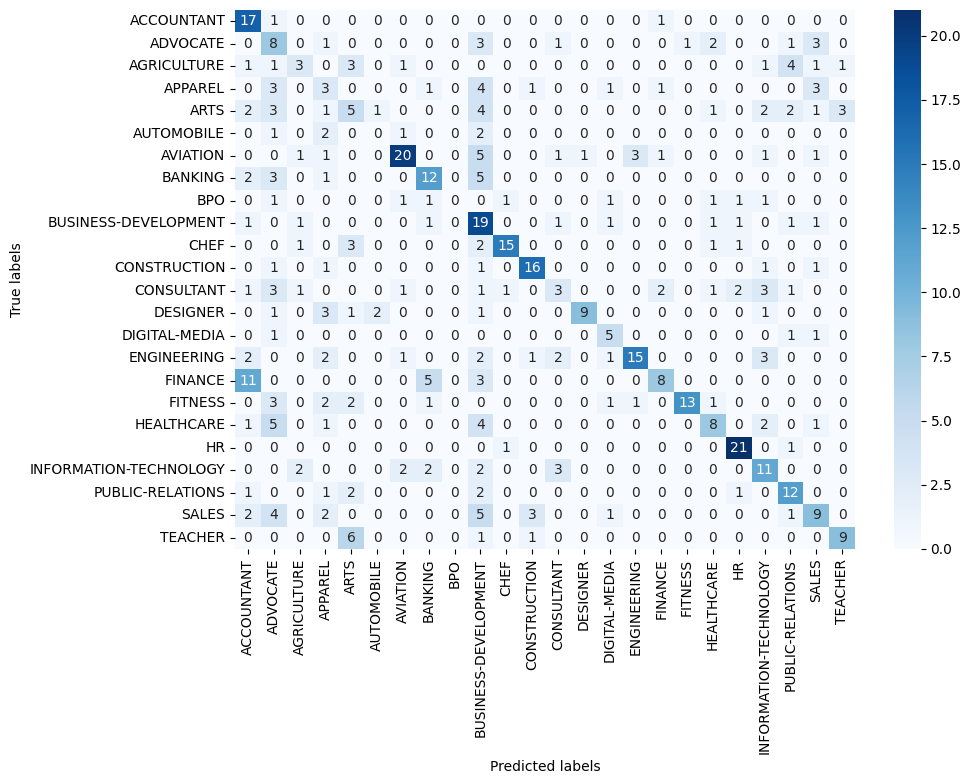

In [ ]:
# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, knn_prediction)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
#plt.title('Confusion Matrix')
plt.show()

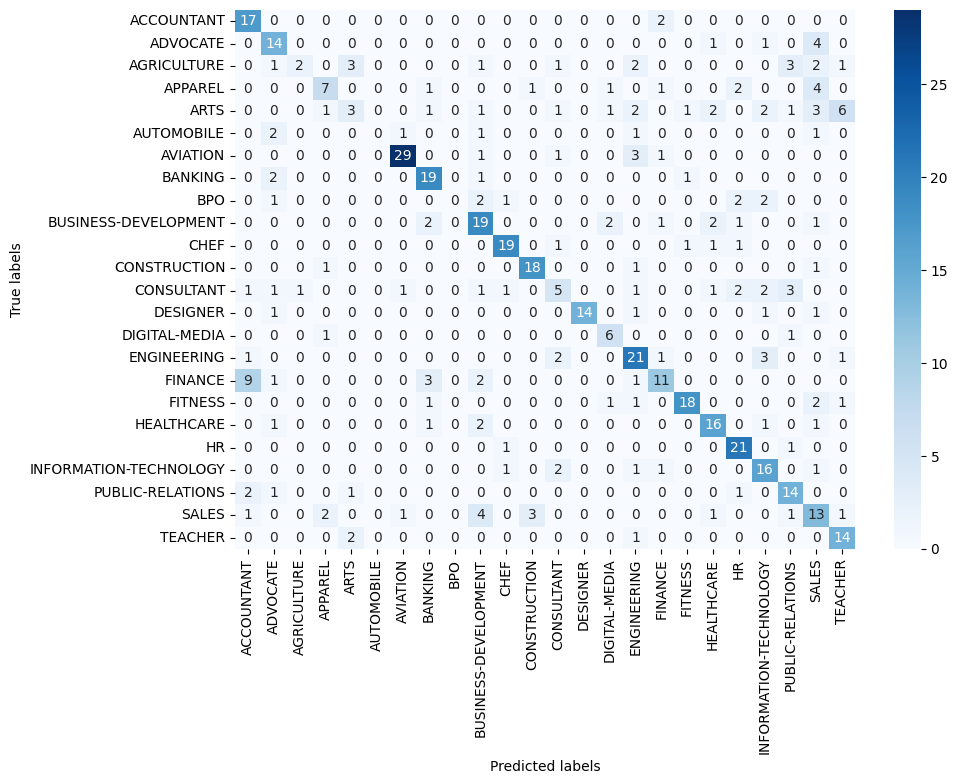

In [ ]:
# Confusion matrix for LR
cm_lr = confusion_matrix(y_test, lr_prediction)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
#plt.title('Confusion Matrix')
plt.show()

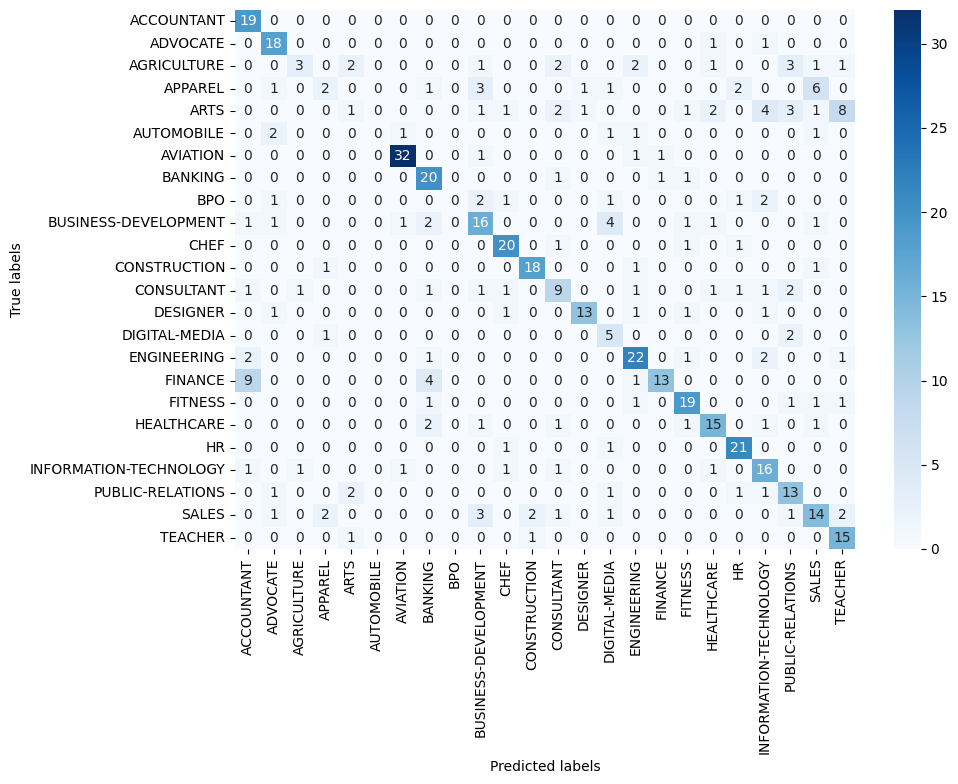

In [ ]:
# Confusion matrix for RF
cm_rf = confusion_matrix(y_test, rf_prediction)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
#plt.title('Confusion Matrix')
plt.show()

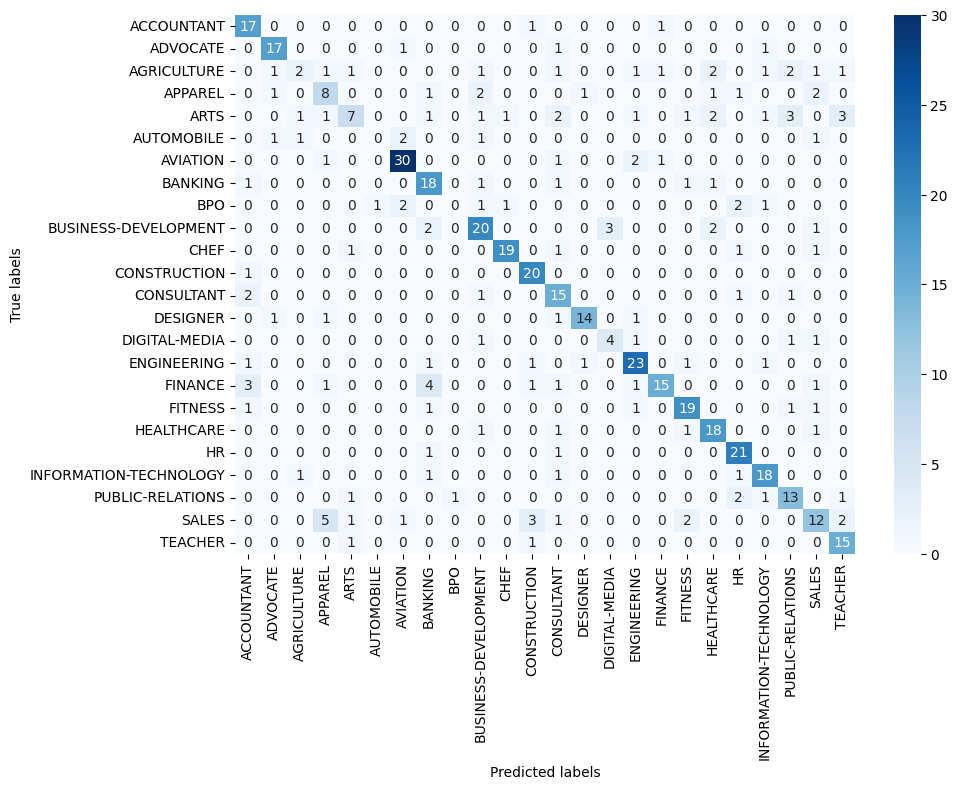

In [ ]:
# Confusion matrix for XGB
cm_xgb = confusion_matrix(y_test, xgb_prediction)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
#plt.title('Confusion Matrix')
plt.show()

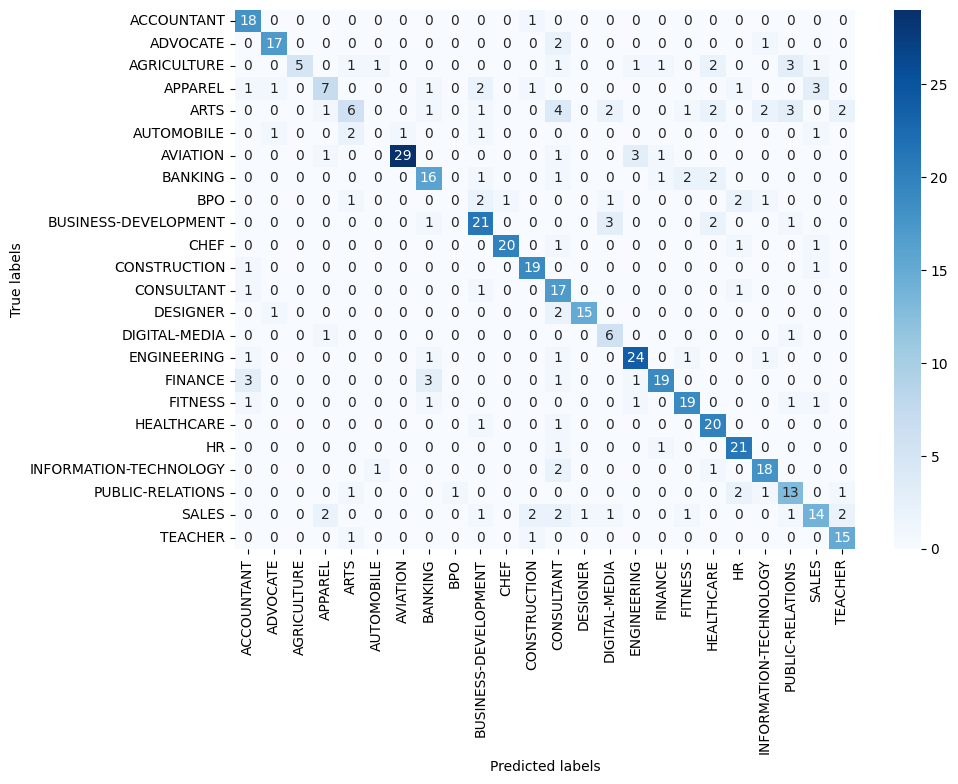

In [ ]:
# Confusion matrix for LGBM
cm_lgb = confusion_matrix(y_test, lgb_prediction)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
#plt.title('Confusion Matrix')
plt.show()